In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [7]:
AUDIO_PATH = "/content/drive/MyDrive/Acted Emotional Speech Dynamic Database/Acted Emotional Speech Dynamic Database"

MAX_LEN = 40
SAMPLE_RATE = 22050
N_MFCC = 13

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC).T

    if mfcc.shape[0] < MAX_LEN:
        pad_width = MAX_LEN - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)), mode='constant')
    else:
        mfcc = mfcc[:MAX_LEN]
    return mfcc


In [8]:
X = []
y = []
# Loop through folders and extract features
for label in os.listdir(AUDIO_PATH):
    folder = os.path.join(AUDIO_PATH, label)
    if os.path.isdir(folder):
        for file in os.listdir(folder):
            if file.endswith('.wav'):
                file_path = os.path.join(folder, file)
                try:
                    mfcc = extract_features(file_path)
                    X.append(mfcc)
                    y.append(label)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

X = np.array(X)
y = np.array(y)

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = tf.keras.utils.to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Data loaded. Shape: {X.shape}, Labels: {le.classes_}")


<ipython-input-7-d18f8555b433>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/drive/MyDrive/Acted Emotional Speech Dynamic Database/Acted Emotional Speech Dynamic Database/sadness/s05 (3).wav: 
Data loaded. Shape: (624, 40, 13), Labels: ['anger' 'disgust' 'fear' 'happiness' 'sadness']


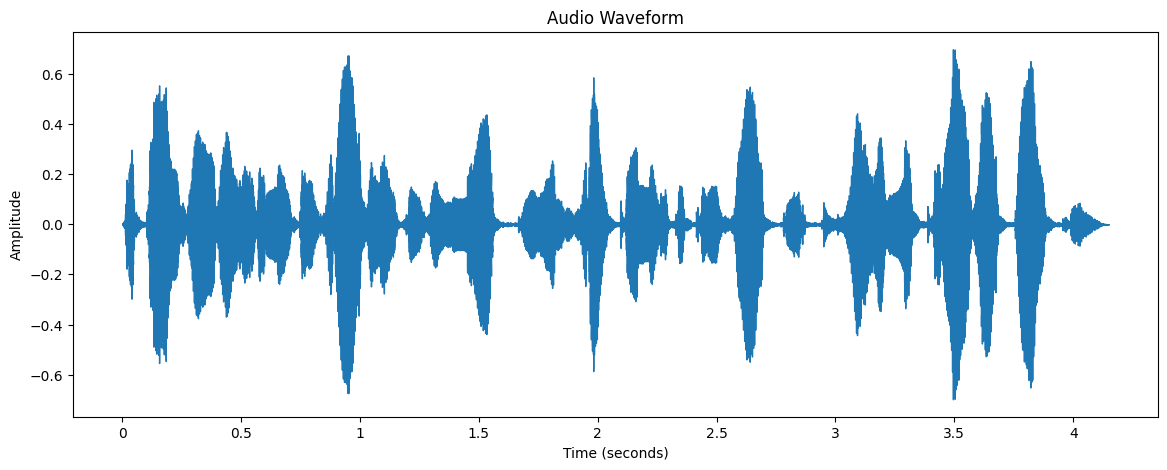

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path = "/content/drive/MyDrive/Acted Emotional Speech Dynamic Database/Acted Emotional Speech Dynamic Database/anger/a01 (1).wav"
y, sr = librosa.load(audio_file_path)

# Plot the audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


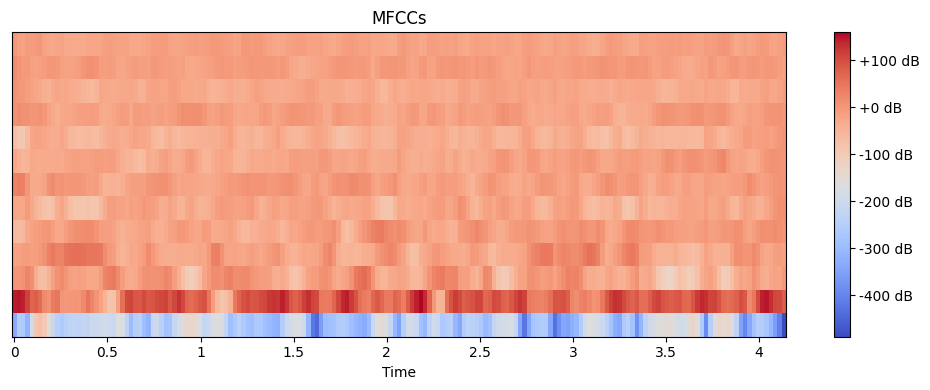

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_file_path = "/content/drive/MyDrive/Acted Emotional Speech Dynamic Database/Acted Emotional Speech Dynamic Database/anger/a01 (1).wav"
y, sr = librosa.load(audio_file_path)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.tight_layout()
plt.show()


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(MAX_LEN, N_MFCC)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.2464 - loss: 1.5967 - val_accuracy: 0.1040 - val_loss: 1.6572
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3464 - loss: 1.5019 - val_accuracy: 0.3360 - val_loss: 1.4461
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4322 - loss: 1.3630 - val_accuracy: 0.2240 - val_loss: 1.4384
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4811 - loss: 1.2723 - val_accuracy: 0.3920 - val_loss: 1.3562
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5157 - loss: 1.1761 - val_accuracy: 0.4720 - val_loss: 1.2151
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5189 - loss: 1.1528 - val_accuracy: 0.3920 - val_loss: 1.3974
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5834 - loss: 1.0202 - val_accuracy: 0.4080 - val_loss: 1.1966
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6273 - loss: 0.9321 - val_accuracy: 0.4240 - v

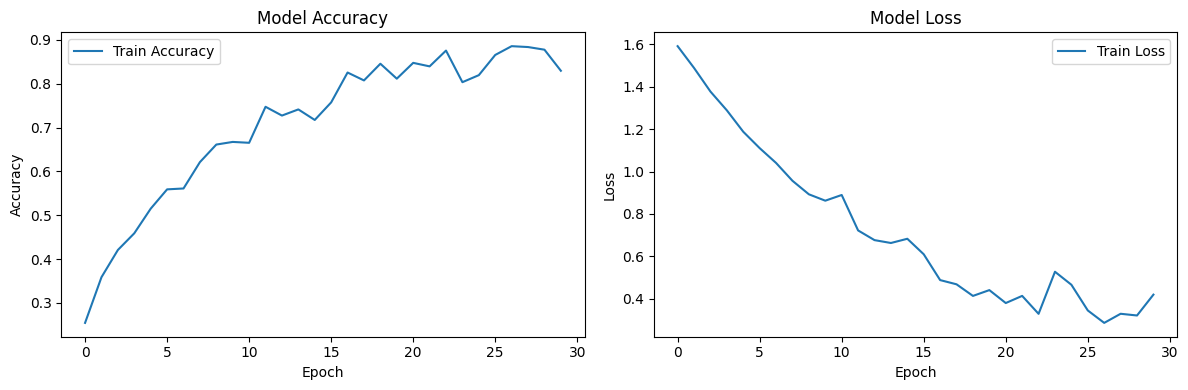

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        mfccs = mfccs.T
        mfccs = mfccs[:40]
        if mfccs.shape[0] < 40:
            pad_width = 40 - mfccs.shape[0]
            mfccs = np.pad(mfccs, ((0, pad_width), (0, 0)), mode='constant')
        return mfccs
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


In [15]:
!pip install librosa
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.7 MB/s eta 0:00:00


In [16]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 40, 64)              │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,433 (673.57 KB)

 Trainable params: 57,477 (224.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 114,956 (449.05 KB)

In [18]:
import os

folder = r"/content/drive/MyDrive/Acted Emotional Speech Dynamic Database/Acted Emotional Speech Dynamic Database"
print(os.listdir(folder))

['anger', 'sadness', 'fear', 'disgust', 'happiness', '.ipynb_checkpoints']


In [19]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=le.classes_)
print(report)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step
              precision    recall  f1-score   support

       anger       0.50      0.48      0.49        25
     disgust       0.42      0.45      0.43        11
        fear       0.52      0.37      0.43        30
   happiness       0.37      0.63      0.47        30
     sadness       0.88      0.52      0.65        29

    accuracy                           0.50       125
   macro avg       0.54      0.49      0.50       125
weighted avg       0.56      0.50      0.50       125



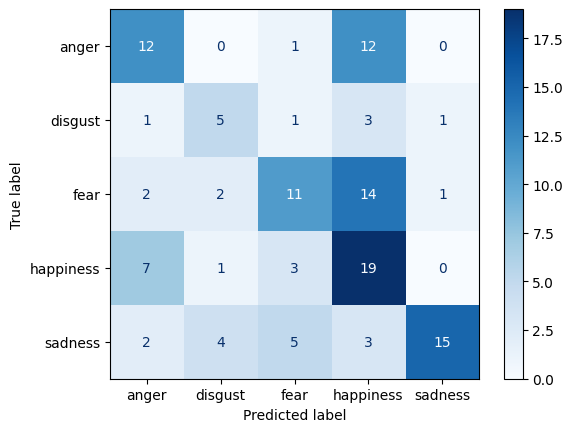

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [21]:
!pip install librosa resampy numpy


In [22]:
!pip install librosa resampy numpy scikit-learn

In [23]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from google.colab import files
import os

In [24]:
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050, duration=4.0)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        if mfccs.shape[1] < 40:
            pad_width = 40 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :40]
        return mfccs.T
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

In [25]:
# Step 5: Prediction function
def predict_gender(audio_file_path):
    mfccs = extract_features(audio_file_path)
    if mfccs is not None:
        mfccs = np.expand_dims(mfccs, axis=0)  # Shape: (1, 40, 13)
        prediction = model.predict(mfccs)
        predicted_class = np.argmax(prediction)
        predicted_label = le.inverse_transform([predicted_class])[0]
        return predicted_label
    else:
        return "Error extracting features."

Saving a01 (3).wav to a01 (3).wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted gender for a01 (3).wav: anger


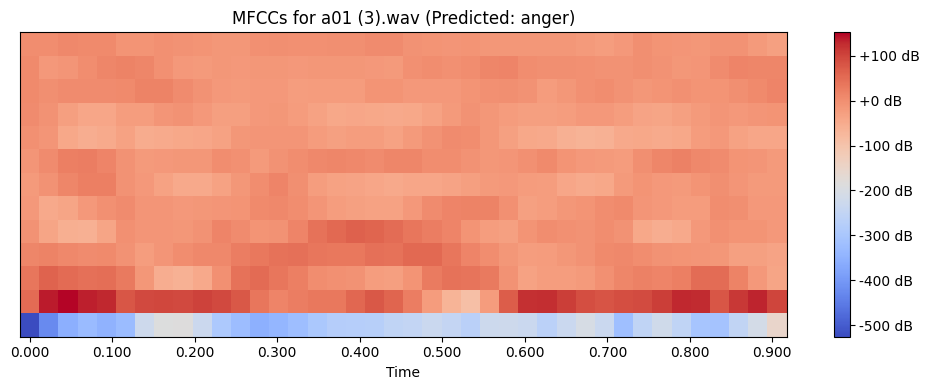

In [26]:

import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_gender = predict_gender(audio_file_path)
    print(f"Predicted gender for {audio_file_path}: {predicted_gender}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_gender})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)


Saving d01 (2).wav to d01 (2).wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted gender for d01 (2).wav: disgust


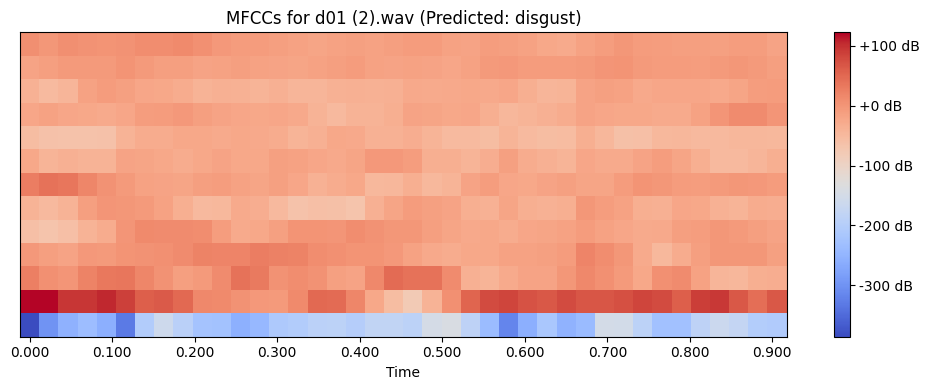

In [27]:
import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_gender = predict_gender(audio_file_path)
    print(f"Predicted gender for {audio_file_path}: {predicted_gender}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_gender})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)


Saving f01 (3).wav to f01 (3).wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted gender for f01 (3).wav: fear


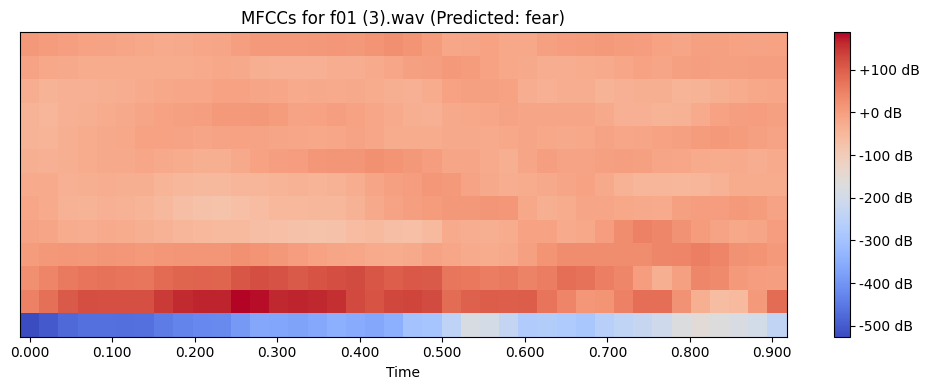

In [28]:
import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_gender = predict_gender(audio_file_path)
    print(f"Predicted gender for {audio_file_path}: {predicted_gender}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_gender})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)


Saving h01 (3).wav to h01 (3) (1).wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted gender for h01 (3) (1).wav: happiness


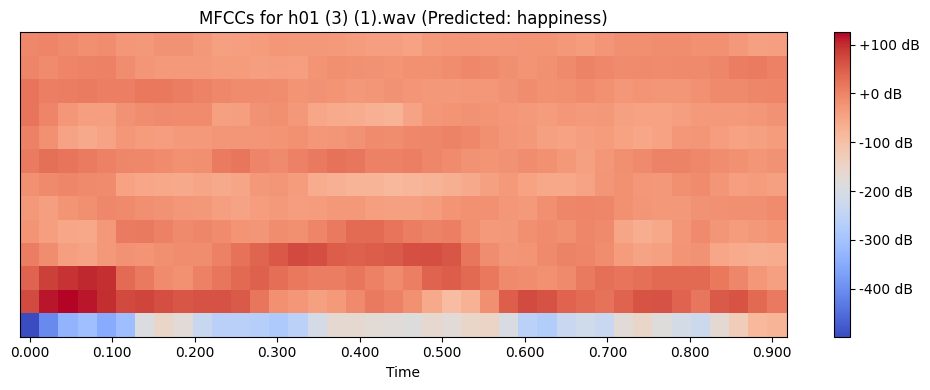

In [30]:
import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_gender = predict_gender(audio_file_path)
    print(f"Predicted gender for {audio_file_path}: {predicted_gender}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_gender})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)


Saving s01 (3).wav to s01 (3).wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted gender for s01 (3).wav: sadness


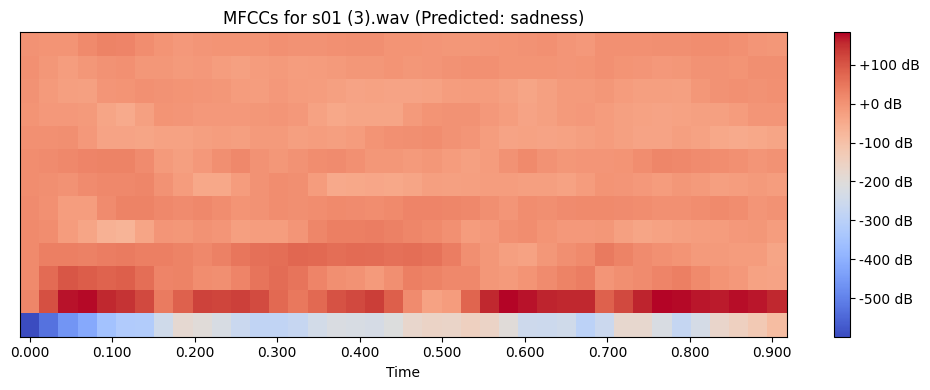

In [31]:
import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_gender = predict_gender(audio_file_path)
    print(f"Predicted gender for {audio_file_path}: {predicted_gender}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_gender})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)
